In [1]:
import pandas as pd
import numpy as np
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
file_path = r"C:\Users\tanap\OneDrive\เดสก์ท็อป\MADT3-NIDA\(3-2566) MADT 8101 Seminar in Advanced Analytics\hackathon\group2_data\group2_data_collaborative_filtering.csv"
product_df = pd.read_csv(file_path)
print(product_df.shape)
product_df.head()
#####

(200, 18)


,customer_id,segment,product_transaction_count_per_category_baby_diapers,product_transaction_count_per_category_beer,product_transaction_count_per_category_children’s_cereal,product_transaction_count_per_category_cooking_oil,product_transaction_count_per_category_fresh_vegetables,product_transaction_count_per_category_house_cleaning_spray,product_transaction_count_per_category_juice_boxes,product_transaction_count_per_category_laundry_detergent,product_transaction_count_per_category_organic_apples,product_transaction_count_per_category_organic_chicken,product_transaction_count_per_category_organic_eggs,product_transaction_count_per_category_organic_milk,product_transaction_count_per_category_red_wine,product_transaction_count_per_category_toothpaste,product_transaction_count_per_category_whole_wheat_bread,product_transaction_count_per_category_wine_glasses
0,1,2,0,0,0,0,0,0,0,0,2,3,2,3,0,0,0,0
1,2,0,0,2,0,0,0,0,0,0,0,0,0,0,6,0,0,4
2,3,0,0,0,0,0,0,3,0,1,0,0,0,0,0,1,0,0
3,4,0,1,0,2,0,0,0,1,0,0,0,0,0,0,0,0,0
4,5,1,4,0,6,0,0,0,5,0,0,0,0,0,0,0,0,0


In [4]:
cols_to_standardize = [col for col in product_df.columns if col not in ['customer_id', 'segment']]
scaler = StandardScaler()
product_df[cols_to_standardize] = scaler.fit_transform(product_df[cols_to_standardize])
product_df.head()

,customer_id,segment,product_transaction_count_per_category_baby_diapers,product_transaction_count_per_category_beer,product_transaction_count_per_category_children’s_cereal,product_transaction_count_per_category_cooking_oil,product_transaction_count_per_category_fresh_vegetables,product_transaction_count_per_category_house_cleaning_spray,product_transaction_count_per_category_juice_boxes,product_transaction_count_per_category_laundry_detergent,product_transaction_count_per_category_organic_apples,product_transaction_count_per_category_organic_chicken,product_transaction_count_per_category_organic_eggs,product_transaction_count_per_category_organic_milk,product_transaction_count_per_category_red_wine,product_transaction_count_per_category_toothpaste,product_transaction_count_per_category_whole_wheat_bread,product_transaction_count_per_category_wine_glasses
0,1,2,-0.465054,-0.482476,-0.475137,-0.237356,-0.222912,-0.412322,-0.465099,-0.405614,1.062923,1.718029,1.640133,2.59980,-0.466083,-0.373772,-0.247333,-0.470212
1,2,0,-0.465054,0.821514,-0.475137,-0.237356,-0.222912,-0.412322,-0.465099,-0.405614,-0.477545,-0.470543,-0.384723,-0.37707,3.500583,-0.373772,-0.247333,2.004588
2,3,0,-0.465054,-0.482476,-0.475137,-0.237356,-0.222912,1.535658,-0.465099,0.195296,-0.477545,-0.470543,-0.384723,-0.37707,-0.466083,0.324867,-0.247333,-0.470212
3,4,0,0.185371,-0.482476,0.783503,-0.237356,-0.222912,-0.412322,0.218870,-0.405614,-0.477545,-0.470543,-0.384723,-0.37707,-0.466083,-0.373772,-0.247333,-0.470212
4,5,1,2.136645,-0.482476,3.300783,-0.237356,-0.222912,-0.412322,2.954749,-0.405614,-0.477545,-0.470543,-0.384723,-0.37707,-0.466083,-0.373772,-0.247333,-0.470212


In [5]:
def get_recommendations(df, cust_id, n_neighbors:int, n_recommendations:int):
    
    interaction_matrix = df.set_index('customer_id').iloc[:, :]
    interaction_sparse_matrix = csr_matrix(interaction_matrix.values)
    product_popularity = interaction_matrix.mean(axis=0).sort_values(ascending=False)
    model_knn = NearestNeighbors(metric='cosine', algorithm='brute')
    model_knn.fit(interaction_sparse_matrix)
    
    customer_index = interaction_matrix.index.get_loc(cust_id)
    customer_interactions = interaction_matrix.iloc[customer_index]
    customer_index_never = 0
    customer_index_no_recom = 0

    if customer_interactions.sum() == 0:
        
        recommendations = product_popularity.head(n_recommendations)
        customer_index_never = cust_id
        
    else:

        distances, indices = model_knn.kneighbors(interaction_sparse_matrix[customer_index], n_neighbors=n_neighbors + 1)
        
        similar_customers = interaction_matrix.index[indices.flatten()].tolist()
        if cust_id in similar_customers:
            similar_customers.remove(cust_id)
        
        similar_customers_interactions = interaction_matrix.loc[similar_customers]
        recommendation_scores = similar_customers_interactions.mean(axis=0)

        if np.all(similar_customers_interactions.sum(axis=1) == similar_customers_interactions.iloc[0].sum()):
            recommendations = product_popularity.head(n_recommendations)
            customer_index_no_recom = cust_id

        else:
            already_participated = interaction_matrix.loc[cust_id] > 0
            recommendation_scores[already_participated] = 0
            
            recommendations = recommendation_scores.sort_values(ascending=False).head(n_recommendations)
            if recommendations.sum() == 0:
                recommendations = product_popularity.head(n_recommendations)
                customer_index_no_recom = cust_id

    if len(recommendations) < n_recommendations:
        additional_recommendations = product_popularity.loc[~product_popularity.index.isin(recommendations.index)]
        recommendations = recommendations.append(additional_recommendations.head(n_recommendations - len(recommendations)))
    
    return recommendations, customer_index_never, customer_index_no_recom

In [6]:
def run(df, product_df, segment: int):
    
    print('segment: ', segment)
    segment_df = product_df[product_df['segment'] == segment].drop(columns='segment', axis=1)
    interaction_matrix = segment_df.set_index('customer_id').iloc[:, :]
    interaction_sparse_matrix = csr_matrix(interaction_matrix.values)
    product_popularity = interaction_matrix.mean(axis=0).sort_values(ascending=False)
    model_knn = NearestNeighbors(metric='cosine', algorithm='brute')
    model_knn.fit(interaction_sparse_matrix)
        
    all_recommendations = {}
    cust_never = []
    cust_no_recom = []
    for cust_id in interaction_matrix.index:
        recommendations, customer_index_never, customer_index_no_recom = get_recommendations(df, cust_id, n_neighbors=5, n_recommendations=1)
        if (customer_index_never > 0):
            cust_never.append(customer_index_never)
        elif (customer_index_no_recom > 0):
            cust_no_recom.append(customer_index_no_recom)
        all_recommendations[cust_id] = recommendations
    # print(len(cust_never))
    # print(len(cust_no_recom))
    no_recom_cust_df = pd.DataFrame(cust_no_recom, columns=['customer_id'])
    no_recom_cust_df['no_recom_flag'] = 1
    never_cust_df = pd.DataFrame(cust_never, columns=['customer_id'])
    never_cust_df['never_flag'] = 1
    recommendations_df = pd.DataFrame.from_dict(all_recommendations, orient='index').stack().reset_index()
    recommendations_df.columns = ['customer_id', 'product', 'avg_buying_txn']
    recommendations_df = recommendations_df.merge(no_recom_cust_df, on='customer_id', how='left')
    recommendations_df = recommendations_df.merge(never_cust_df, on='customer_id', how='left')
    recommendations_df['no_recom_flag'] = recommendations_df['no_recom_flag'].fillna(0).astype('int')
    recommendations_df['never_flag'] = recommendations_df['never_flag'].fillna(0).astype('int')
    recommendations_df['popularity_recom'] = np.where((recommendations_df['no_recom_flag'] + recommendations_df['never_flag']) > 0, 1, 0)
    recommendations_df['segment'] = 'segment_' + str(segment)

    print(recommendations_df.shape)
    recommendations_df.sort_values(by='customer_id', ascending=True)
    
    return recommendations_df

file_path = r"C:\Users\tanap\OneDrive\เดสก์ท็อป\MADT3-NIDA\(3-2566) MADT 8101 Seminar in Advanced Analytics\hackathon\group2_data\group2_data_collaborative_filtering.csv"
product_df = pd.read_csv(file_path)
    
segment_list = [0, 1, 2, 3]
df_list = []
for segment in segment_list:
    print(segment)
    segment_df = product_df[product_df['segment'] == segment].drop(columns='segment', axis=1)
    df = run(df=segment_df, product_df=product_df, segment=segment)
    df_list.append(df)

all_segment_df = pd.concat(df_list, ignore_index=True)
all_segment_df['product'] = all_segment_df['product'].str.replace(r'product_transaction_count_per_category_', '', regex=True)

0
segment:  0
(101, 7)
1
segment:  1
(32, 7)
2
segment:  2
(39, 7)
3
segment:  3
(28, 7)


In [7]:
all_segment_df

,customer_id,product,avg_buying_txn,no_recom_flag,never_flag,popularity_recom,segment
0,2,wine_glasses,1.50495,1,0,1,segment_0
1,3,wine_glasses,1.50495,1,0,1,segment_0
2,4,wine_glasses,1.50495,1,0,1,segment_0
3,7,wine_glasses,1.50495,1,0,1,segment_0
4,10,wine_glasses,1.50495,1,0,1,segment_0
...,...,...,...,...,...,...,...
195,184,laundry_detergent,4.25000,1,0,1,segment_3
196,190,laundry_detergent,4.25000,1,0,1,segment_3
197,191,laundry_detergent,4.25000,1,0,1,segment_3
198,197,laundry_detergent,4.25000,1,0,1,segment_3


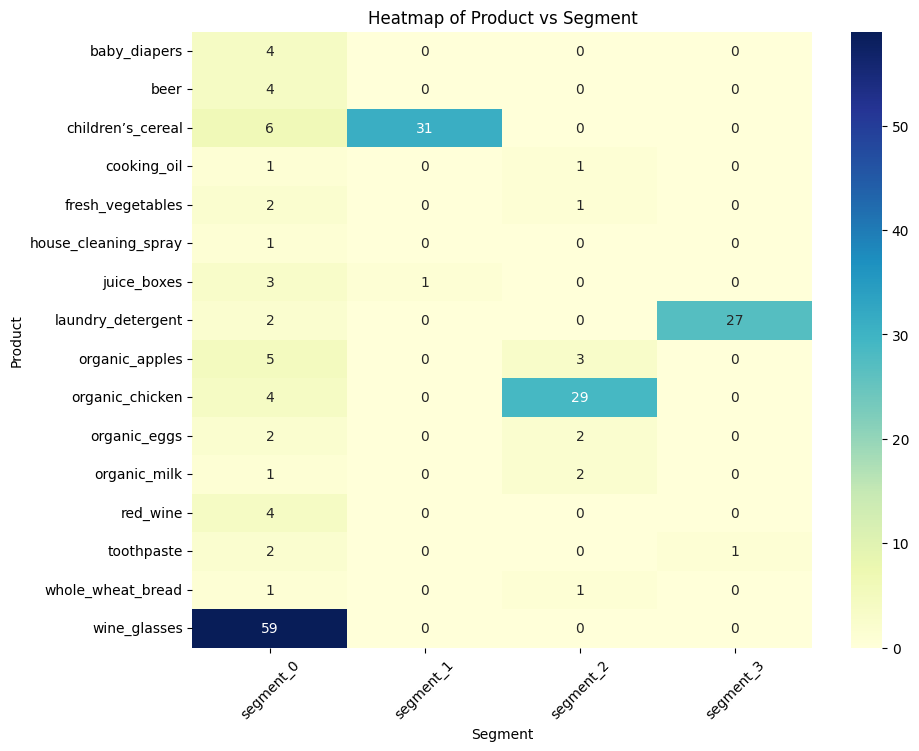

In [12]:
pivot_table = all_segment_df.pivot_table(index='product', columns='segment', aggfunc='size', fill_value=0)

plt.figure(figsize=(10, 8))
sns.heatmap(pivot_table, cmap="YlGnBu", annot=True, fmt="d")
plt.title('Heatmap of Product vs Segment')
plt.xlabel('Segment')
plt.ylabel('Product')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

<div style="text-align: center;"> 
    <p style="font-weight: bold; color: White;"> Save data </p>
    <p style="color: Gray;"> Collaborative filtering result </p>
</div>

In [25]:
file_path_collaborative_filtering_result = r"C:\Users\tanap\OneDrive\เดสก์ท็อป\MADT3-NIDA\(3-2566) MADT 8101 Seminar in Advanced Analytics\hackathon\group2_data\group2_collaborative_filtering_result.csv"
all_segment_df.to_csv(file_path_collaborative_filtering_result, index=False)